# Lanzini Numerical-Simulation-Exercise10
# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Exercise 10.1

Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 10 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

### Exercise 10.2

Apply your code to the TSP problem for 50 american state-capitals longitude and latitude coordinates in the *American_capitals.dat* file.

Do you improve with respect using one single Continent?

Do you improve with respect using (up to) 10 independent Continents?

## Structure of the code

### TSP 

In order to solve these exercises, I used the same code of exercises 9, adapted to the 50 american cities situation. Moreover, I sligthly changed probabilities of mutation and crossover:
1. **70 %** probability of **crossover** ;
2. **10%** probability of **permutation among m contiguos cities**;
3. **10%** probability of **permutation (5 cities)**;
4. **2%** probability of **shift**;
5. **8%** probability of **inversion of the order**.

(See Random.cpp, Random.h, main.cpp)

### Parallelization with MPI

The **MPI** functions I used for migrations were:
1. **MPI_Bcast()** (blocking) : It broadcasts the message from a specific process called root to all the other processes in the communicator given as an argument. I used It to send the best gene from a single continent to all the others.

2. **MPI_Gather()** (blocking) : It transmits data from all the processes in the communicator to a single receiving process. The length of the message sent from each process must be the same. I used it to communicate the best result to **rank 0** and print its coordinates and length.

3. **MPI_Wtime()** To keep an eye on time.

4. **MPI functions** for **initialization** and **conclusion**

(See main.cpp)

I studied several cases with a number of continents between **1 to 6**. 

- 1000 iterations, 8 migrations (if size>1)

- 10000 iterations, 80 migrations (if size>1)

- 15000 iterations, 120 migrations (if size>1)

I found the best path with **15000** iterations and **5 continents**.

At the end, I studied what is the effect of **parallelization without migrations**: no important improvements are observed (see final part of this notebook).

# Results

## 1000 Iterations

Here I show the results that came out when I performed 1000 iterations of the program. 1000 iterations are still few to find a good path, but they show how parallelizing and migration bring to different solutions. For size>1, the program performed a migration every 125 steps (**8 migration in total**). 
I show results for **size = 1(no migration), 2, 3, 4, 5, 6 continents**.

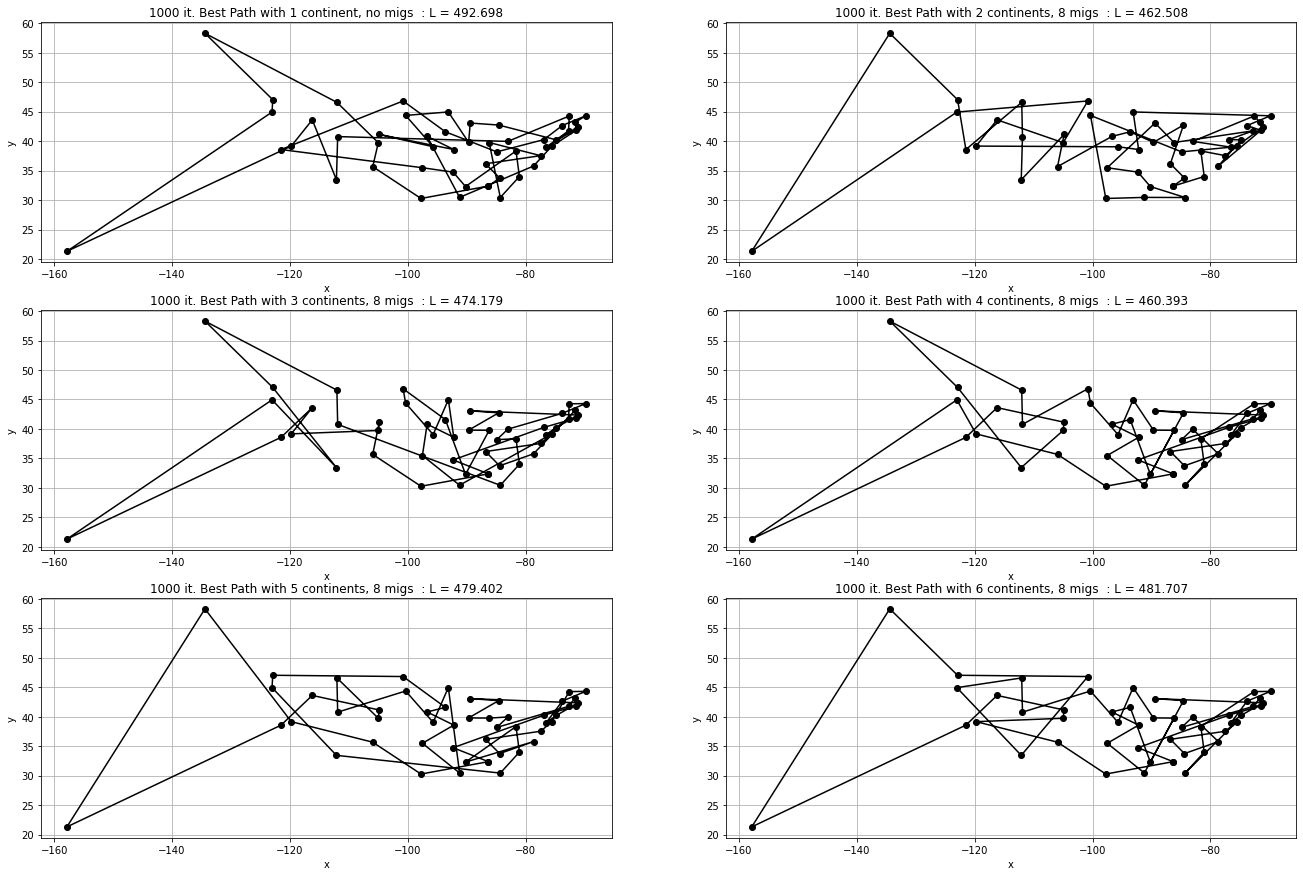

In [2]:
f1=open("best_path_cord_1000_1.txt", "r")
f2=open("best_path_cord_1000_2.txt", "r")
f3=open("best_path_cord_1000_3.txt", "r")
f4=open("best_path_cord_1000_4.txt", "r")
f5=open("best_path_cord_1000_5.txt", "r")
f6=open("best_path_cord_1000_6.txt", "r")

x_s1, y_s1 = np.loadtxt("best_path_cord_1000_1.txt", unpack=True,usecols=(0, 1), delimiter=' ')
x_s2, y_s2 = np.loadtxt("best_path_cord_1000_2.txt", unpack=True,usecols=(0, 1), delimiter=' ')
x_s3, y_s3 = np.loadtxt("best_path_cord_1000_3.txt", unpack=True,usecols=(0, 1), delimiter=' ')
x_s4, y_s4 = np.loadtxt("best_path_cord_1000_4.txt", unpack=True,usecols=(0, 1), delimiter=' ')
x_s5, y_s5 = np.loadtxt("best_path_cord_1000_5.txt", unpack=True,usecols=(0, 1), delimiter=' ')
x_s6, y_s6 = np.loadtxt("best_path_cord_1000_6.txt", unpack=True,usecols=(0, 1), delimiter=' ')


fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]]=plt.subplots(3, 2,figsize=(22.5, 15))

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("1000 it. Best Path with 1 continent, no migs  : L = 492.698")
ax1.plot(x_s1, y_s1, '-ok', color='Black')
ax1.grid(True)

ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("1000 it. Best Path with 2 continents, 8 migs  : L = 462.508")
ax2.plot(x_s2, y_s2, '-ok', color='Black')
ax2.grid(True)

ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("1000 it. Best Path with 3 continents, 8 migs  : L = 474.179")
ax3.plot(x_s3, y_s3, '-ok', color='Black')
ax3.grid(True)

ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_title("1000 it. Best Path with 4 continents, 8 migs  : L = 460.393")
ax4.plot(x_s4, y_s4, '-ok', color='Black')
ax4.grid(True)

ax5.set_xlabel("x")
ax5.set_ylabel("y")
ax5.set_title("1000 it. Best Path with 5 continents, 8 migs  : L = 479.402")
ax5.plot(x_s5, y_s5, '-ok', color='Black')
ax5.grid(True)

ax6.set_xlabel("x")
ax6.set_ylabel("y")
ax6.set_title("1000 it. Best Path with 6 continents, 8 migs  : L = 481.707")
ax6.plot(x_s6, y_s6, '-ok', color='Black')
ax6.grid(True)

### Performance

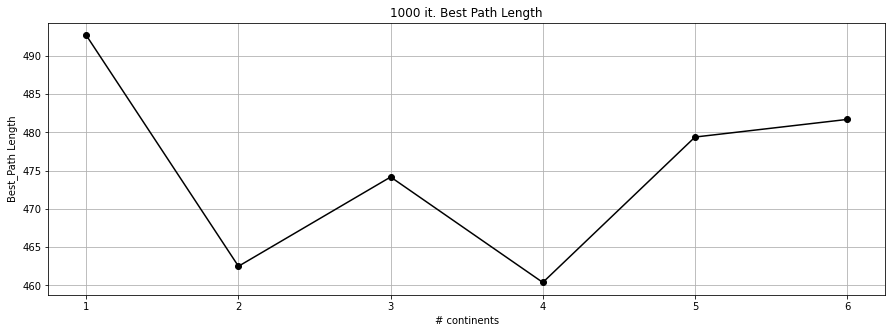

In [3]:
f5=open("Min_Lengths_1000.txt", "r")
nr_continents = [1,2,3,4,5,6]
fig, ax7 = plt.subplots(1, 1, figsize=(15, 5))
length = np.loadtxt("Min_Lengths_1000.txt", unpack=True)


ax7.set_xlabel("# continents")
ax7.set_ylabel("Best_Path Length")
ax7.set_title("1000 it. Best Path Length")
ax7.plot(nr_continents, length, '-ok', color='Black')
ax7.grid(True)

We can observe this strange behaviour : for 1000 iterations, 2, 3 or 4 continents find a better path than 5 or 6 continents. I think this is due to the fact there are too few migrations (8). In fact, if there are more continents, with the same amount of migrations, they are less involved in migrations. This could explain why with only two continents we have such a "good" solution. With 10000 and 15000 iterations, I will perform many more migrations, and this behaviour will disappear.

Generally, with only 1000 iterations, we are still far from finding a good path.

## 10000 Iterations

Here the different results obtained with 10000 iterations of the program. If size>1 ($N_{cont}>1$), the number of migrations is **80**, every **125 steps**.

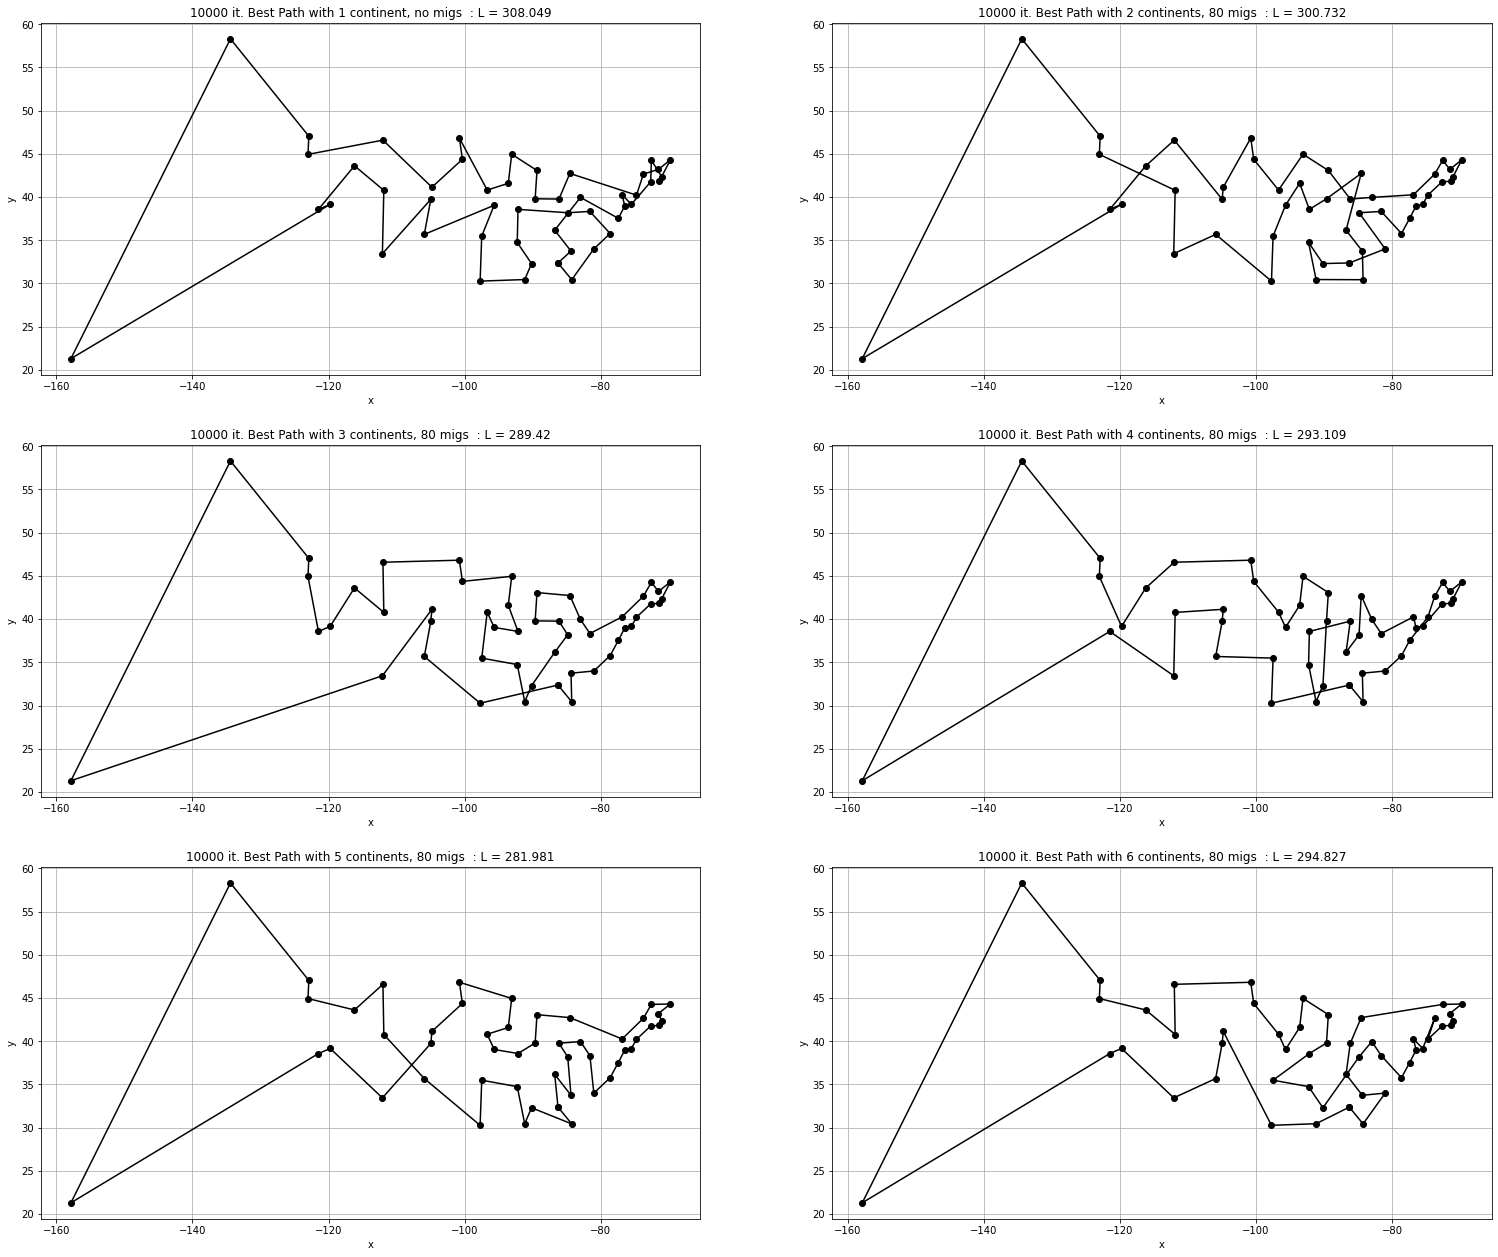

In [4]:
f1=open("best_path_cord_10000_1.txt", "r")
f2=open("best_path_cord_10000_2.txt", "r")
f3=open("best_path_cord_10000_3.txt", "r")
f4=open("best_path_cord_10000_4.txt", "r")
f5=open("best_path_cord_10000_5.txt", "r")
f6=open("best_path_cord_10000_6.txt", "r")

x_s1, y_s1 = np.loadtxt("best_path_cord_10000_1.txt", unpack=True,usecols=(0, 1), delimiter=' ')
x_s2, y_s2 = np.loadtxt("best_path_cord_10000_2.txt", unpack=True,usecols=(0, 1), delimiter=' ')
x_s3, y_s3 = np.loadtxt("best_path_cord_10000_3.txt", unpack=True,usecols=(0, 1), delimiter=' ')
x_s4, y_s4 = np.loadtxt("best_path_cord_10000_4.txt", unpack=True,usecols=(0, 1), delimiter=' ')
x_s5, y_s5 = np.loadtxt("best_path_cord_10000_5.txt", unpack=True,usecols=(0, 1), delimiter=' ')
x_s6, y_s6 = np.loadtxt("best_path_cord_10000_6.txt", unpack=True,usecols=(0, 1), delimiter=' ')

fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]]=plt.subplots(3, 2,figsize=(26, 22))

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("10000 it. Best Path with 1 continent, no migs  : L = 308.049")
ax1.plot(x_s1, y_s1, '-ok', color='Black')
ax1.grid(True)

ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("10000 it. Best Path with 2 continents, 80 migs  : L = 300.732")
ax2.plot(x_s2, y_s2, '-ok', color='Black')
ax2.grid(True)

ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("10000 it. Best Path with 3 continents, 80 migs  : L = 289.42")
ax3.plot(x_s3, y_s3, '-ok', color='Black')
ax3.grid(True)

ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_title("10000 it. Best Path with 4 continents, 80 migs  : L = 293.109")
ax4.plot(x_s4, y_s4, '-ok', color='Black')
ax4.grid(True)

ax5.set_xlabel("x")
ax5.set_ylabel("y")
ax5.set_title("10000 it. Best Path with 5 continents, 80 migs  : L = 281.981")
ax5.plot(x_s5, y_s5, '-ok', color='Black')
ax5.grid(True)

ax6.set_xlabel("x")
ax6.set_ylabel("y")
ax6.set_title("10000 it. Best Path with 6 continents, 80 migs  : L = 294.827")
ax6.plot(x_s6, y_s6, '-ok', color='Black')
ax6.grid(True)


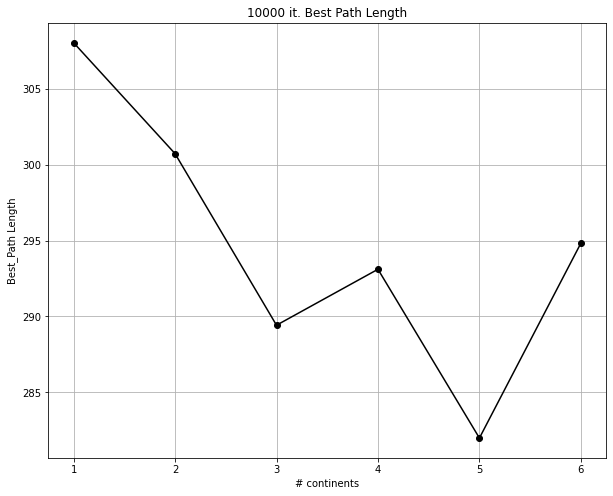

In [5]:
f5=open("Min_Lengths_10000.txt", "r")
nr_continents = [1,2,3,4,5,6]
fig, (ax7) = plt.subplots(1, 1, figsize=(10, 8))
length = np.loadtxt("Min_Lengths_10000.txt", unpack=True)

ax7.set_xlabel("# continents")
ax7.set_ylabel("Best_Path Length")
ax7.set_title("10000 it. Best Path Length")
ax7.plot(nr_continents, length, '-ok', color='Black')
ax7.grid(True)

With **10000 iterations**, the best path is found with 5 continents (80 migs). Generally, we can see that parallelization with a higher number of continents improves the performance. Moreover, Here 5 continents are much better than 6, maybe because too many continents can cause "confusion" in migrations.
- **Best Result with 10 000 iterations: 5 continents, L = 281.981**.

Although we are close to the best path, It still  looks improvable. I'll try with 15 000 iterations

## 15000 Iterations

Here the different results obtained with 15000 iterations of the program. If size>1 ($N_{cont}>1$), the number of migrations is **120**, every 125 steps.

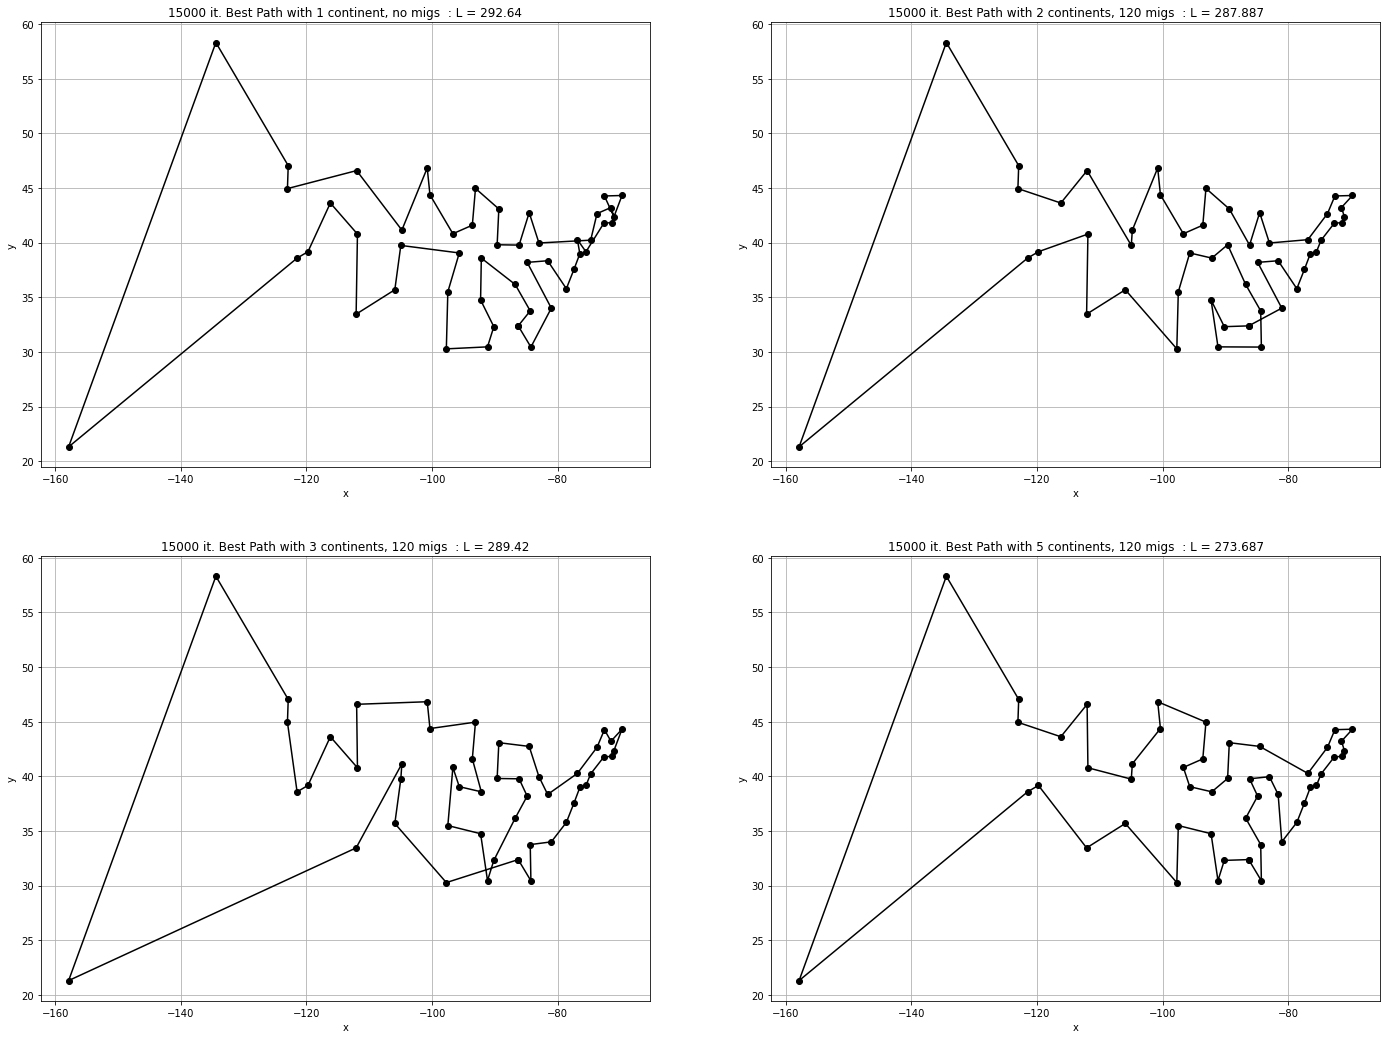

In [6]:
f1=open("best_path_cord_15000_1.txt", "r")
f2=open("best_path_cord_15000_2.txt", "r")
f3=open("best_path_cord_15000_3.txt", "r")
f5=open("best_path_cord_15000_5.txt", "r")


x_s1, y_s1 = np.loadtxt("best_path_cord_15000_1.txt", unpack=True,usecols=(0, 1), delimiter=' ')
x_s2, y_s2 = np.loadtxt("best_path_cord_15000_2.txt", unpack=True,usecols=(0, 1), delimiter=' ')
x_s3, y_s3 = np.loadtxt("best_path_cord_15000_3.txt", unpack=True,usecols=(0, 1), delimiter=' ')
x_s5, y_s5 = np.loadtxt("best_path_cord_15000_5.txt", unpack=True,usecols=(0, 1), delimiter=' ')


fig, [[ax1, ax2], [ax3, ax5]]=plt.subplots(2, 2,figsize=(24, 18))

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("15000 it. Best Path with 1 continent, no migs  : L = 292.64")
ax1.plot(x_s1, y_s1, '-ok', color='Black')
ax1.grid(True)

ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("15000 it. Best Path with 2 continents, 120 migs  : L = 287.887")
ax2.plot(x_s2, y_s2, '-ok', color='Black')
ax2.grid(True)

ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("15000 it. Best Path with 3 continents, 120 migs  : L = 289.42")
ax3.plot(x_s3, y_s3, '-ok', color='Black')
ax3.grid(True)

ax5.set_xlabel("x")
ax5.set_ylabel("y")
ax5.set_title("15000 it. Best Path with 5 continents, 120 migs  : L = 273.687")
ax5.plot(x_s5, y_s5, '-ok', color='Black')
ax5.grid(True)

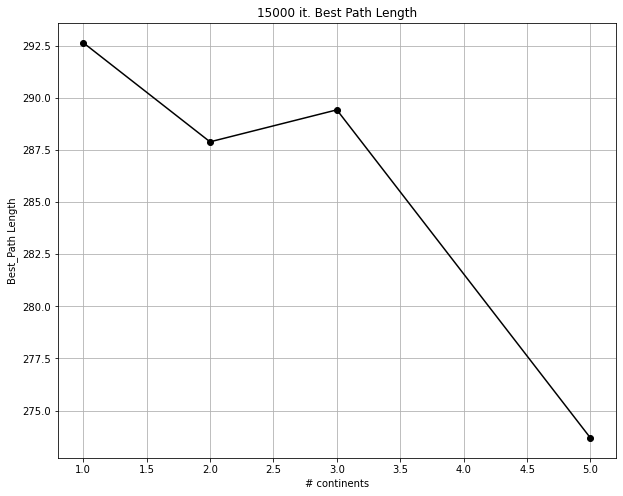

In [7]:
f5=open("Min_Lengths_15000.txt", "r")
nr_continents = [1,2,3,5]
fig, (ax7) = plt.subplots(1, 1, figsize=(10, 8))
length = np.loadtxt("Min_Lengths_15000.txt", unpack=True)

ax7.set_xlabel("# continents")
ax7.set_ylabel("Best_Path Length")
ax7.set_title("15000 it. Best Path Length")
ax7.plot(nr_continents, length, '-ok', color='Black')
ax7.grid(True)

**Best path found : L = 273.687 with 15000 iterations, 5 continents and 120 migrations.**

## Parallelization without Migrations
### 10000 Iterations

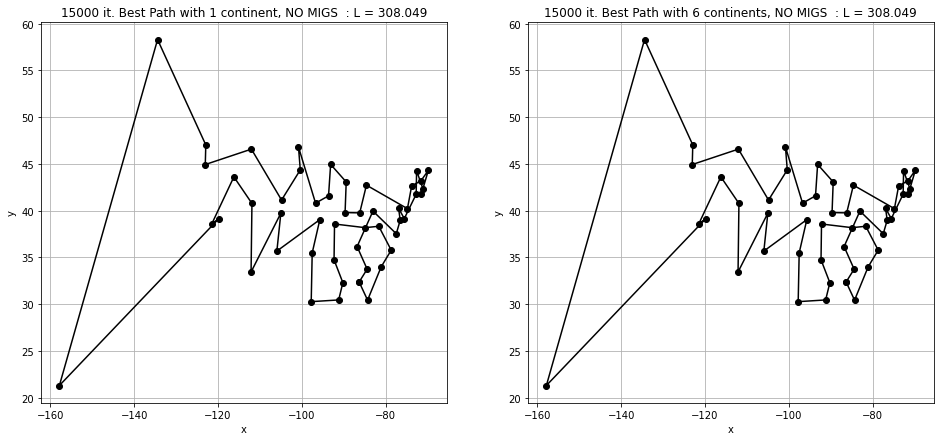

In [8]:
f1=open("best_path_cord_nomig_1.txt", "r")
f2=open("best_path_cord_nomig_6.txt", "r")

x_s1, y_s1 = np.loadtxt("best_path_cord_nomig_1.txt", unpack=True,usecols=(0, 1), delimiter=' ')

x_s6, y_s6 = np.loadtxt("best_path_cord_nomig_6.txt", unpack=True,usecols=(0, 1), delimiter=' ')


fig, [ax1, ax2]=plt.subplots(1, 2,figsize=(16, 7))

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("15000 it. Best Path with 1 continent, NO MIGS  : L = 308.049")
ax1.plot(x_s1, y_s1, '-ok', color='Black')
ax1.grid(True)

ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("15000 it. Best Path with 6 continents, NO MIGS  : L = 308.049")
ax2.plot(x_s6, y_s6, '-ok', color='Black')
ax2.grid(True)

They are the same path. Therefore, best path is found in core 0 and parallelization without migrations is totally useless.